### Import necessary libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import re
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots    

### Data loading and exploration

<iframe src="https://www.kaggle.com/embed/vivek468/will-the-customer-churn?cellId=2&cellIds=2&kernelSessionId=74773094" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="Will the Customer Churn?😥📉"></iframe>

In [3]:
path = os.getcwd()
print(path)

C:\Users\dell\CODELION\Kaggle


In [5]:
products_df = pd.read_csv("/kaggle/input/learnplatform-covid19-impact-on-digital-learning/products_info.csv")
districts_df = pd.read_csv("/kaggle/input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv")

districts_df.shape, products_df.shape

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/learnplatform-covid19-impact-on-digital-learning/products_info.csv'

In [5]:
products_df.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [6]:
# Checking the file names in the engagement_data folder
engagement_df= os.listdir("../input/learnplatform-covid19-impact-on-digital-learning/engagement_data")
engagement_df[0:10]

['6345.csv',
 '9812.csv',
 '2339.csv',
 '5404.csv',
 '5150.csv',
 '1624.csv',
 '3188.csv',
 '7964.csv',
 '2165.csv',
 '9463.csv']

In [7]:
# Checking the file named '1000.csv' as a sample
engagement_1000_df = pd.read_csv("../input/learnplatform-covid19-impact-on-digital-learning/engagement_data/1000.csv")
engagement_1000_df.head()

,time,lp_id,pct_access,engagement_index
0,2020-01-01,93690.0,0.00,NaN
1,2020-01-01,17941.0,0.03,0.90
2,2020-01-01,65358.0,0.03,1.20
3,2020-01-01,98265.0,0.57,37.79
4,2020-01-01,59257.0,0.00,NaN


## 🏷Preprocessing
* dropping 57 school districts with NaN states (57/233 ~ 25%)
* Listing the products name list in 2020 according to the sector
* one-hot encoding the product sectors
* splitting up the primary essential function into main and sub category
* Adding 'district_id' colum in the engagement_data file
* Checking the data by date.

### 📣dropping 57 school districts with NaN states (57/233 ~ 25%)

In [8]:
# Missing Value check of district_df 
districts_df.isna().sum()

district_id                   0
state                        57
locale                       57
pct_black/hispanic           57
pct_free/reduced             85
county_connections_ratio     71
pp_total_raw                115
dtype: int64

In [9]:
# Original state value
print(districts_df.shape)
districts_df = districts_df[districts_df.state.notna()].reset_index(drop=True)
# Deleting Nan value in the 'state' column
print(districts_df.shape)

(233, 7)
(176, 7)


### 📣Listing the products name list in 2020 according to the sector
* I think PreK-12 & PreK-12; Higher Ed; Corporate is important.

In [10]:
# Finding a kind of data in the 'Sector' column
products_df['Sector(s)'].unique()

array(['PreK-12', 'PreK-12; Higher Ed', 'PreK-12; Higher Ed; Corporate',
       nan, 'Corporate', 'Higher Ed; Corporate'], dtype=object)

In [11]:
products_df['Sector(s)'].value_counts()

PreK-12                          170
PreK-12; Higher Ed; Corporate    115
PreK-12; Higher Ed                65
Corporate                          1
Higher Ed; Corporate               1
Name: Sector(s), dtype: int64

In [12]:
# PreK-12
prek12_df = products_df[products_df['Sector(s)'].isin(['PreK-12'])]

prek12_df['Product Name'].unique()

array(['SplashLearn', 'ABCmouse.com', 'ABCya!', 'Achieve3000',
       'Actively Learn', 'AdaptedMind', 'Amplify', 'Book Creator',
       'BrainPOP', 'CK-12', 'ClassDojo', 'Clever', 'Code.org', 'CoolMath',
       'Discovery Education', 'DreamBox', 'Edpuzzle',
       'Earthquakes for Kids', 'Ellevation', 'EngageNY', 'Reflex Math',
       'Flipgrid', 'GeoGebra', 'GoGuardian', 'GoNoodle', 'Hapara',
       'IXL Math', 'Imagine Learning', 'Infinite Campus', 'Instructables',
       'iStation', 'The Washington Post KidsPost', 'LearnZillion',
       'Learning A-Z', 'Lexia Core5 Reading', 'Little Alchemy',
       'MasteryConnect', 'Math Playground', "NASA's Space Place",
       'Nearpod', 'Newsela', 'NoRedInk', 'PBS Kids', 'PBS LearningMedia',
       'Panorama Education', 'PebbleGo', 'Prodigy', 'Quia Web', 'Quill',
       'Quizlet', 'Raz-Kids', 'ReadWorks', 'ReadWriteThink',
       'Reading A-Z', 'Remind', 'ST Math', 'School Loop', 'Schoolnet',
       'Schoology', 'Scratch', 'Securly Anywhere Fi

In [13]:
# PreK-12; Higher Ed; Corporate
prek12_higher_cor_df = products_df[products_df['Sector(s)'].isin(['PreK-12; Higher Ed; Corporate'])]
prek12_higher_cor_df['Product Name'].unique()

array(['Audible', 'CNN Student News', 'Canvas',
       'Dictionary - Merriam-Webster', 'Dictionary.com', 'Dropbox',
       'Duolingo', 'Edgenuity', 'Encyclopedia Britannica', 'Facebook',
       'Google Books', 'Google Chrome', 'Google Docs', 'Google Drive',
       'Google Earth', 'Google Forms', 'Google Hangouts', 'Google Sites',
       'Google Translate', 'Google Voice', 'Google Currents', 'Grammarly',
       'Internet Archive', 'Issuu', 'Kahoot!', 'Library of Congress',
       'LinkedIn', 'Padlet', 'Pixlr', 'PowerSchool', 'Prezi', 'Quora',
       'SoundCloud', 'Spotify: Music and podcasts', 'Thesaurus.com',
       'ThingLink', 'TypingClub', 'Vimeo', 'WeVideo for Schools', 'WebEx',
       'Wikimedia Commons', 'Wikipedia', 'Wix', 'WordPress', 'YouTube',
       'Calculator.com', 'MAPP', 'Google Classroom', 'SurveyMonkey',
       'Box', 'Wistia', 'Autodesk', 'ContentKeeper', 'Lumen Learning',
       'Zoom', 'Google Drawings', 'Quizizz', 'Calendly', 'Canva',
       'Screencast-O-Matic', '

### 📣one-hot encoding the product sectors

In [14]:
temp_sectors = products_df['Sector(s)'].str.get_dummies(sep="; ") 
temp_sectors.head()

,Corporate,Higher Ed,PreK-12
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,1
4,0,0,1


In [15]:
temp_sectors.columns = [f"sector_{re.sub(' ', '', c)}" for c in temp_sectors.columns]  

In [16]:
temp_sectors.columns

Index(['sector_Corporate', 'sector_HigherEd', 'sector_PreK-12'], dtype='object')

In [17]:
products_df = products_df.join(temp_sectors)
products_df.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,sector_Corporate,sector_HigherEd,sector_PreK-12
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,0,0,1
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms,0,0,1
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si...",0,0,1
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms,0,1,1
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms,0,0,1


In [18]:
products_df.drop("Sector(s)", axis=1, inplace=True)
print(products_df.columns)
del temp_sectors

Index(['LP ID', 'URL', 'Product Name', 'Provider/Company Name',
       'Primary Essential Function', 'sector_Corporate', 'sector_HigherEd',
       'sector_PreK-12'],
      dtype='object')


### 📣Dividing Primary Essential Function as main/sub function 

In [19]:
products_df['pri_function_main'] = products_df['Primary Essential Function'].apply(lambda x: x.split(' - ')[0] if x == x else x)
products_df['pri_function_sub'] = products_df['Primary Essential Function'].apply(lambda x: x.split(' - ')[1] if x == x else x)

In [20]:
products_df.head()

,LP ID,URL,Product Name,Provider/Company Name,Primary Essential Function,sector_Corporate,sector_HigherEd,sector_PreK-12,pri_function_main,pri_function_sub
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,LC - Digital Learning Platforms,0,0,1,LC,Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",LC - Digital Learning Platforms,0,0,1,LC,Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC","LC - Sites, Resources & Reference - Games & Si...",0,0,1,LC,"Sites, Resources & Reference"
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,LC - Digital Learning Platforms,0,1,1,LC,Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,LC - Digital Learning Platforms,0,0,1,LC,Digital Learning Platforms


In [21]:
# Synchronize similar values
products_df['pri_function_sub'] = products_df['pri_function_sub'].replace(
          {'Sites, Resources & References' : 'Sites, Resources & Reference'})
products_df.drop("Primary Essential Function", axis=1, inplace=True)

In [22]:
products_df['pri_function_sub'].unique()

array(['Digital Learning Platforms', 'Sites, Resources & Reference',
       'Courseware & Textbooks', 'Study Tools', 'Teacher Resources',
       'Learning Management Systems (LMS)', 'Content Creation & Curation',
       'Online Course Providers & Technical Skills Development',
       'Classroom Engagement & Instruction', 'School Management Software',
       'Other', 'Data, Analytics & Reporting', 'Virtual Classroom', nan,
       'Career Planning & Job Search', 'Human Resources',
       'Large-Scale & Standardized Testing',
       'Admissions, Enrollment & Rostering',
       'Environmental, Health & Safety (EHS) Compliance'], dtype=object)

In [23]:
products_df[ ['sector_Corporate', 'sector_HigherEd', 'sector_PreK-12',
       'pri_function_main', 'pri_function_sub'] ]

,sector_Corporate,sector_HigherEd,sector_PreK-12,pri_function_main,pri_function_sub
0,0,0,1,LC,Digital Learning Platforms
1,0,0,1,LC,Digital Learning Platforms
2,0,0,1,LC,"Sites, Resources & Reference"
3,0,1,1,LC,Digital Learning Platforms
4,0,0,1,LC,Digital Learning Platforms
...,...,...,...,...,...
367,1,1,1,SDO,Other
368,1,1,1,LC,Content Creation & Curation
369,0,1,1,LC,"Sites, Resources & Reference"
370,0,0,0,NaN,NaN


### 📣engagement_data의 데이터 파일에 district_id를 추가

In [24]:
districts_df.district_id.unique()

array([8815, 4921, 5987, 3710, 7177, 9812, 6584, 1044, 7457, 1904, 5527,
       2257, 7614, 4808, 1877, 2779, 8328, 8539, 9043, 1549, 4051, 7305,
       2167, 6577, 4602, 4936, 4520, 7785, 3668, 7970, 5231, 9589, 8433,
       2165, 2074, 1142, 7964, 8784, 7798, 3550, 1444, 2601, 7660, 9899,
       1742, 4629, 4569, 4949, 6250, 8425, 6418, 1558, 3222, 1772, 5604,
       9007, 8884, 1712, 3412, 2940, 5042, 3692, 4683, 2567, 2321, 7767,
       7308, 5006, 9140, 8902, 5890, 4031, 6640, 6194, 3864, 2598, 5600,
       2991, 2106, 6919, 7980, 2060, 7387, 1000, 5150, 2956, 9553, 1536,
       8937, 1791, 4516, 2872, 2439, 8520, 2130, 3772, 4775, 9778, 5524,
       1470, 5802, 1324, 3160, 2393, 9230, 3248, 8556, 5627, 4550, 7752,
       2729, 4348, 3986, 9537, 1052, 6762, 3670, 1204, 2870, 3558, 1450,
       3080, 2517, 1570, 4668, 6055, 2285, 2172, 7741, 6998, 3322, 4083,
       3936, 7675, 4744, 9478, 7541, 1270, 8076, 6345, 4183, 9357, 5510,
       6104, 3228, 5422, 8127, 3640, 8256, 1857, 54

In [25]:
PATH = "../input/learnplatform-covid19-impact-on-digital-learning/engagement_data"

temp = []

for district in districts_df.district_id.unique():
    df = pd.read_csv(f'{PATH}/{district}.csv', index_col=None, header=0)
    df['district_id'] = district
    temp.append(df)

len(temp)

176

In [26]:

engagement = pd.concat(temp)
engagement = engagement.reset_index(drop=True)
engagement.head()


,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-27,32213.0,100.00,3000.00,8815
1,2020-02-25,90153.0,33.33,2666.67,8815
2,2020-02-25,99916.0,0.00,NaN,8815
3,2020-02-25,28504.0,0.00,NaN,8815
4,2020-02-25,95731.0,33.33,333.33,8815


## 🏷EDA(Exploratory Data Analysis)

### 📣날짜별 데이터 확인

* 대부분의 학군에는 366일의 고유 일수가 있습니다.
* 그러나 43개의 학군의 경우, 366일 미만의 고유한 데이터를 사용할 수 있음.
* district_id 3670의 경우, 2020-02-15부터 2020-03-02의 데이터만 사용이 가능.
* district_id 2872의 경우, 2020년 1월의 데이터만 사용 가능하고, 2월과 3월의 각각 1일, 총 2일만 데이터 사용가능

In [27]:
len(engagement.district_id.unique())

176

In [28]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17435744 entries, 0 to 17435743
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   time              object 
 1   lp_id             float64
 2   pct_access        float64
 3   engagement_index  float64
 4   district_id       int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 665.1+ MB


In [29]:
# 아무 district 하나 찍어서(3670) 몇개의 time 데이터가 있는지 확인
engagement[engagement['district_id']==3670].time.unique()

# 366일이 아님. 

array(['2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-03-02'], dtype=object)

### ✔각 district_id에 대해 사용가능한 날짜(366일) 카운트를 히스토그램으로 표현

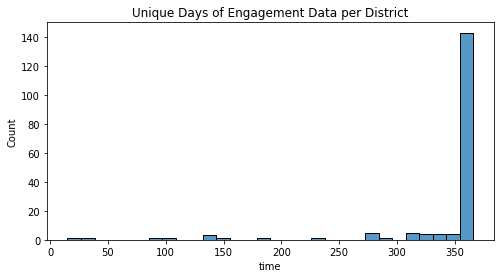

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))

sns.histplot(engagement.groupby('district_id').time.nunique(), bins=30)
ax.set_title('Unique Days of Engagement Data per District')
plt.show()

In [31]:
# 앞에서 확인한 engagement를 지우고, 366일 인것만 새롭게 만든다.
del engagement

temp = []

for district in districts_df.district_id.unique():
    df = pd.read_csv(f'{PATH}/{district}.csv', index_col=None, header=0)
    df["district_id"] = district
    if df.time.nunique() == 366:    # 366일인 것만 추가하겠다. 
        temp.append(df)

engagement = pd.concat(temp)   # 366일인것만 뽑아서 pandas로 찍기 
engagement = engagement.reset_index(drop=True)

In [32]:
districts_df.shape, products_df.shape

((176, 7), (372, 9))

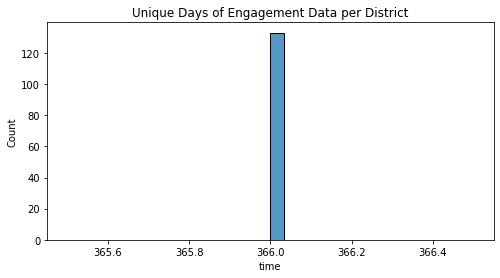

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))

sns.histplot(engagement.groupby('district_id').time.nunique(), bins=30)
ax.set_title('Unique Days of Engagement Data per District')
plt.show()

### ✔366일 있는 데이터만 합친다.

* 컬럼명과 파일명 연결시키기

In [34]:
# isin()메소드는 해당 열에서 필요한 데이터(행)만 가져오는 것
# districts_df를 366일 있는 distric_id로 채운 것으로 다시 재 정의 
districts_df = districts_df[districts_df.district_id.isin(engagement.district_id.unique())].reset_index(drop=True)
# products_df를 366일 있는 lp_id로 채운 것으로 다시 재 정의 
products_df = products_df[products_df['LP ID'].isin(engagement.lp_id.unique())].reset_index(drop=True)

In [35]:
products_df.head()

,LP ID,URL,Product Name,Provider/Company Name,sector_Corporate,sector_HigherEd,sector_PreK-12,pri_function_main,pri_function_sub
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,0,0,1,LC,Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",0,0,1,LC,Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",0,0,1,LC,"Sites, Resources & Reference"
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,0,1,1,LC,Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,0,0,1,LC,Digital Learning Platforms


### 📣 이용 가능한 학군 확인.
* 학군이 가장 많이 있는 주는 CT(29)와 UT(24)
* 학군이 하나만 있는 주는 (FL, TN, NY, AZ)

In [36]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District Of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [37]:
districts_df['state_abbrev'] = districts_df['state'].replace(us_state_abbrev)
districts_df

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,state_abbrev
0,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000[",UT
1,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000[",NC
2,9812,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000[",UT
3,6584,North Carolina,Rural,"[0.4, 0.6[","[0.6, 0.8[","[0.18, 1[","[8000, 10000[",NC
4,1044,Missouri,Suburb,"[0, 0.2[","[0, 0.2[",NaN,"[10000, 12000[",MO
...,...,...,...,...,...,...,...,...
128,5882,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1[","[14000, 16000[",MA
129,1705,Washington,City,"[0.2, 0.4[","[0.4, 0.6[","[0.18, 1[","[12000, 14000[",WA
130,4929,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[12000, 14000[",VA
131,7975,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN,CA


In [38]:
districts_df_by_state = districts_df['state_abbrev'].value_counts().to_frame().reset_index(drop=False)
districts_df_by_state.head(15)

,index,state_abbrev
0,CT,29
1,UT,24
2,MA,17
3,IL,13
4,CA,9
5,OH,8
6,MO,6
7,IN,5
8,WA,4
9,VA,3


In [39]:
districts_df_by_state.columns = ['state_abbrev', 'num_districts']

fig = go.Figure()
layout = dict(
    title_text = "Number of Available School Districts per State",
    geo_scope='usa',
)

fig.add_trace(
    go.Choropleth(
        locations=districts_df_by_state.state_abbrev,
        zmax=1,
        z = districts_df_by_state.num_districts,
        locationmode = 'USA-states', # set of locations match entries in `locations`
        marker_line_color='white',
        geo='geo',
        colorscale=px.colors.sequential.Teal, 
    )
)
            
fig.update_layout(layout)   
fig.show()

### 📣pri_function_main의 분포도 확인

* 'Primary Essential Function'의 열에서 가장 일반적인 범주는 LC(learning & curriculum), 교실 관리(CM)및 학교 및 학군 운영(SDO)

In [40]:
# Check the distribution of 'pri_function_main'
products_df['pri_function_main'].value_counts()

LC           271
CM            34
SDO           29
LC/CM/SDO     16
Name: pri_function_main, dtype: int64

In [41]:
products_df['pri_function_sub'].unique()

array(['Digital Learning Platforms', 'Sites, Resources & Reference',
       'Courseware & Textbooks', 'Study Tools', 'Teacher Resources',
       'Learning Management Systems (LMS)', 'Content Creation & Curation',
       'Online Course Providers & Technical Skills Development',
       'Classroom Engagement & Instruction', 'School Management Software',
       'Other', 'Data, Analytics & Reporting', 'Virtual Classroom', nan,
       'Career Planning & Job Search', 'Human Resources',
       'Large-Scale & Standardized Testing',
       'Admissions, Enrollment & Rostering',
       'Environmental, Health & Safety (EHS) Compliance'], dtype=object)

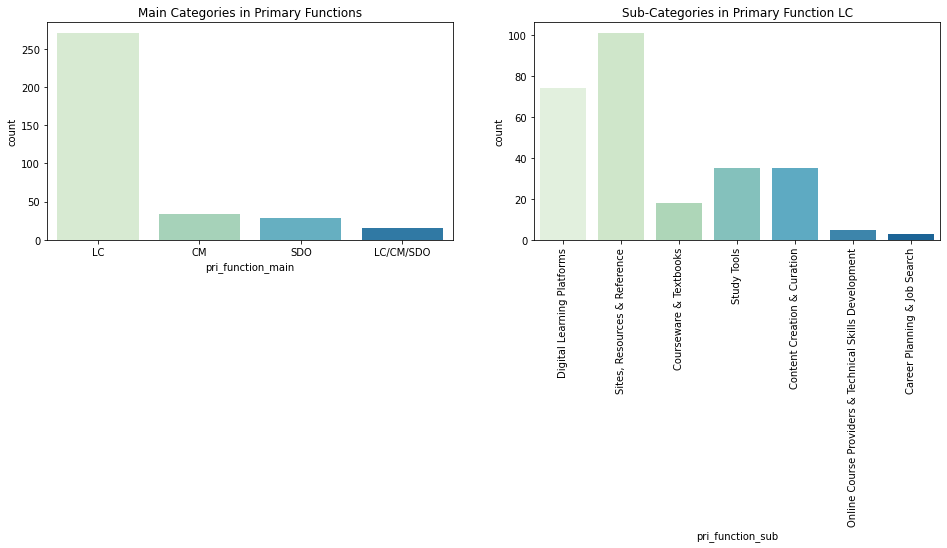

In [42]:
# Check the number of data with countplot

#Fig1
fig, ax = plt.subplots(1, 2, figsize=(16,4))
sns.countplot(data=products_df, x='pri_function_main', palette ='GnBu', ax=ax[0])
ax[0].set_title('Main Categories in Primary Functions')


#Fig2
sns.countplot(data=products_df[products_df.pri_function_main == 'LC'], x='pri_function_sub', palette ='GnBu', ax=ax[1])
ax[1].set_title('Sub-Categories in Primary Function LC')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)


plt.show()

### 📣Checking the number of data of [pri_function_main] & [pri_function_sub]

In [43]:
# display(products_df.sum())

display(products_df.groupby('pri_function_main')['pri_function_sub'].value_counts().to_frame())

pri_function_sub
pri_function_main pri_function_sub                                                    
CM                Classroom Engagement & Instruction                                20
                  Teacher Resources                                                  7
                  Virtual Classroom                                                  7
LC                Sites, Resources & Reference                                     101
                  Digital Learning Platforms                                        74
                  Content Creation & Curation                                       35
                  Study Tools                                                       35
                  Courseware & Textbooks                                            18
                  Online Course Providers & Technical Skills Deve...                 5
                  Career Planning & Job Search                                       3
LC/CM/SDO         Other                                                             16
SDO               Data, Analytics & Reporting                                       11
                  Learning Management Systems (LMS)                                  5
                  Human Resources                                                    4
                  School Management Software                                         4
                  Large-Scale & Standardized Testing                                 2
                  Admissions, Enrollment & Rostering                                 1
                  Environmental, Health & Safety (EHS) Compliance                    1
                  Other                                                              1

### 📣Let's take a look at the product name in the Virtual Classroom!


In [46]:
 products_df[products_df['pri_function_sub'].isin(['Virtual Classroom'])]

,LP ID,URL,Product Name,Provider/Company Name,sector_Corporate,sector_HigherEd,sector_PreK-12,pri_function_main,pri_function_sub
52,48333,https://hangouts.google.com/,Google Hangouts,Google LLC,1,1,1,CM,Virtual Classroom
137,32050,https://www.webex.com/,WebEx,Cisco,1,1,1,CM,Virtual Classroom
193,61945,https://zoom.us/,Zoom,"ZOOM VIDEO COMMUNICATIONS, INC.",1,1,1,CM,Virtual Classroom
215,18982,https://www.gotomeeting.com/,GoToMeeting,LogMeIn,1,1,1,CM,Virtual Classroom
287,99580,https://loom.com/,"Loom - Video Recorder: Screen, Webcam and Mic","Loom, Inc",1,1,1,CM,Virtual Classroom
345,98845,https://meet.google.com/_meet,Meet,Google LLC,1,1,1,CM,Virtual Classroom
355,22767,https://apps.apple.com/us/app/zoom-cloud-meeti...,ZOOM Cloud Meetings,"ZOOM VIDEO COMMUNICATIONS, INC.",1,1,1,CM,Virtual Classroom


### 여름 방학 이후  Virtual Classroom의 pct_access는 전염병 초기에 관찰된 대로 더 높은 수준으로 증가다소 일정하게 유지

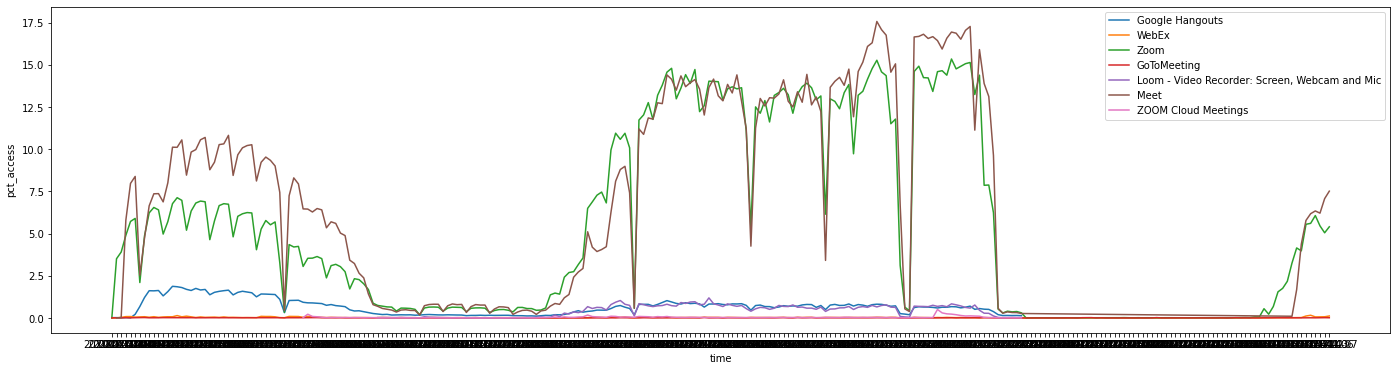

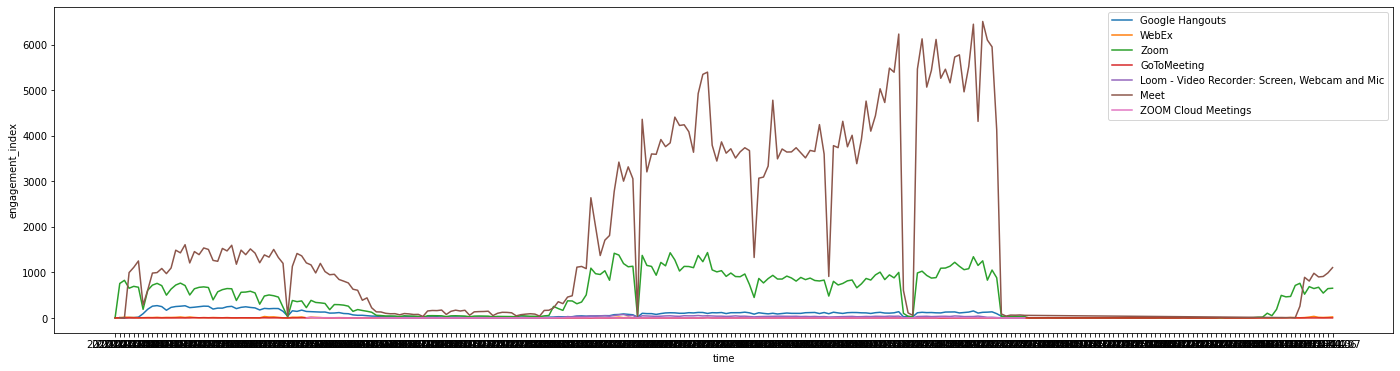

In [50]:
#  virtual_classroom에 해당하는 LP ID를 찾는다. 
virtual_classroom_lp_id = products_df[
                          products_df.pri_function_sub == 'Virtual Classroom']['LP ID'].unique()

# Remove weekends from the dataframe
#.weekday() 정수로 요일을 반환합니다. 월요일은 0이고 일요일은 6입니다.
engagement['weekday'] = pd.DatetimeIndex(engagement['time']).weekday
engagement_without_weekends = engagement[engagement.weekday < 5]

# Figure 1
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
for virtual_classroom_product in virtual_classroom_lp_id:
    temp = engagement_without_weekends[
            engagement_without_weekends.lp_id == virtual_classroom_product].groupby('time').pct_access.mean().to_frame().reset_index(drop=False)
    sns.lineplot(x=temp.time, y=temp.pct_access, 
                 label=products_df[
                 products_df['LP ID'] == virtual_classroom_product]['Product Name'].values[0])
plt.legend()
plt.show()

# Figure 2
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
for virtual_classroom_product in virtual_classroom_lp_id:
    temp = engagement_without_weekends[
            engagement_without_weekends.lp_id == virtual_classroom_product].groupby('time').engagement_index.mean().to_frame().reset_index(drop=False)
    sns.lineplot(x=temp.time, 
                 y=temp.engagement_index, 
                 label=products_df[
                     products_df['LP ID'] == virtual_classroom_product]['Product Name'].values[0])
plt.legend()
plt.show()

### ⬆확인된 내용
* 홈 스쿨링은 3월 초에 시작
* 3월과 7월 사이에 종모양이 있음.
* 7월과 8월에는 여름 방학이 있으므로 참석할 수업이 없음.
* V 여름 방학 이후 pct_access는 전염병 초기에 관찰된 대로 더 높은 수준으로 증가 다소 일정하게 유지
* 연중 내내 pct_access에 몇몇 하락이 모인다. 이는 공휴일 또는 기타 공휴일 가능성이 있음.
* V Zoom과 Meet는 가상 교실에서 가장 인기 있는 제품.